# Assignment#4
## Rhichard Koh

### Step-1: Import all library

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

### Step-2: Load the Diabetes Dataset

In [2]:
df = pd.read_csv('diabetes.csv', names=['Number of times pregnant','Plasma glucose concentration' ,'Diastolic blood pressure' ,'Triceps skin fold thickness' ,'2-Hour serum insulin' ,'Body mass index' ,'Diabetes pedigree function' ,'Age' ,'Class variable'])
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Step-3: Train-Test Split

In [3]:
X = df.drop(columns=['Class variable'])
y = df['Class variable']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled

array([[ 0.93138344,  2.0179454 ,  0.78066953, ...,  0.43148259,
        -0.37477883,  0.63212912],
       [ 0.63260632, -1.14861888,  0.46538785, ..., -0.1198324 ,
        -0.29416766,  0.71699246],
       [-0.56250219, -0.47692343, -0.2702694 , ..., -0.20958135,
         2.74517192,  0.03808578],
       ...,
       [-0.86127931, -0.76479291,  0.04501228, ...,  0.76483585,
        -0.78380586, -0.30136756],
       [ 0.63260632,  2.20985838,  1.2010451 , ...,  0.43148259,
        -0.60466993,  2.75371249],
       [ 0.03505207,  0.73852549, -0.58555107, ..., -0.33779414,
        -0.57779954,  0.29267578]])

### Step-4: Train a Keras Model

Train a Neural Network model with 200 epochs and batch size of 16.

In [12]:
model = Sequential(
    [
        Dense(12, input_dim=X.shape[1], activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=16)

model.summary()

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 0.6740 - accuracy: 0.6276 - val_loss: 13.9520 - val_accuracy: 0.6494
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6443 - val_loss: 10.8458 - val_accuracy: 0.6494
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6555 - val_loss: 8.1454 - val_accuracy: 0.6494
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.6555 - val_loss: 6.4489 - val_accuracy: 0.6494
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.6555 - val_loss: 4.4894 - val_accuracy: 0.6494
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.6648 - val_loss: 3.2711 - val_accuracy: 0.6190
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.6890 - val_loss: 2.7113 - val_accuracy: 0.6061
Epoch 8/200

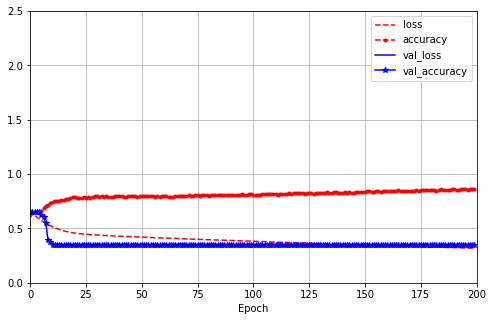

In [13]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5),  xlim=[0, 200], ylim=[0, 2.5], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])

plt.legend(loc="best")

plt.show()

### Step-5: Make prediction on data point [[6,148,72,35,0,33.6,0.627,50]

In [14]:
data = [[6,148,72,35,0,33.6,0.627,50]]
data_scaled = scaler.transform(data)

data_prediction = model.predict(data_scaled)
data_prediction = [1 if i > 0.5 else 0 for i in data_prediction]
data_prediction

1/1 [==============================] - 0s 37ms/step


C:\Users\xxryk\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[1]